### Connecting to the DataBase

In [6]:
import mysql.connector as sql
import json, os, warnings
from tabulate import tabulate
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
warnings.simplefilter(action='ignore', category=FutureWarning)
load_dotenv()

#MySQL Server Connection
conn = sql.connect(
    host = os.getenv("MYSQL_HOST"),
    user = os.getenv("MYSQL_USER"),
    password = os.getenv("MYSQL_PASSWORD"),
    database = 'DataAnalysis',
    port = '3306',
    use_pure = True)

cursor = conn.cursor(buffered=True , dictionary=True)

### Test data set using Remax Real Estate Data
> Gathering Remax real estate listing data to find out the house pricing in different cities in Greater Toronto Area (GTA)
> List of Divisions in GTA:
> + Ajax
> + Aurora
> + Brampton
> + Brock
> + Burlington
> + Caledon
> + Clarington
> + East Gwillimbury
> + Georgina
> + Halton Hills
> + King
> + Markham
> + Mississauga
> + Milton
> + Newmarket
> + Oakville
> + Oshawa
> + Pickering
> + Richmond Hill
> + Scugog
> + Toronto
> + Uxbridge
> + Vaughan
> + Whitchurch-Stouffville
> + Whitby

In [7]:
query = ''' SELECT RemaxListings.Id, RemaxListings.AddressStreet, RemaxListings.CityName,
RemaxListings.ListingType, AVG(RemaxListingsAssociations.Price) AS Price 
FROM RemaxListingsAssociations INNER JOIN RemaxListings ON 
RemaxListingsAssociations.Id = RemaxListings.Id
WHERE CityName IN ('Ajax', 'Aurora', 'Brampton', 'Brock', 'Burlington', 'Caledon', 'Clarington', 
'East Gwillimbury', 'Georgina', 'Halton Hills', 'King', 'Markham', 'Mississauga', 
'Milton', 'Newmarket', 'Oakville', 'Oshawa','Pickering', 'Richmond Hill', 'Scugog',  
'Toronto','Uxbridge', 'Vaughan', 'Whitchurch-Stouffville', 'Whitby') 
AND Price > 10000 AND RemaxListings.ListingType <> 'RENTAL'
AND RemaxListings.ListingType in ('Single Family', 'Multi-Family')
GROUP BY RemaxListings.Id'''
cursor.execute(query)
result_set = cursor.fetchall()

### Visualizing The Result Using Table

In [8]:
#header = ['Id', 'Address', 'City', 'Type', 'Price']
#Sort the Values by Price
#dict_getter = itemgetter("Price")
#result_set.sort(key=dict_getter, reverse=True)

values = []
for result in result_set:
    values.append(list(result.values()))
#print(tabulate(values, headers=header))

### Visualizing Data Using Scatterplot Graph
> Find the mean price of all the cities in the GTA area using Scatterplot Graph

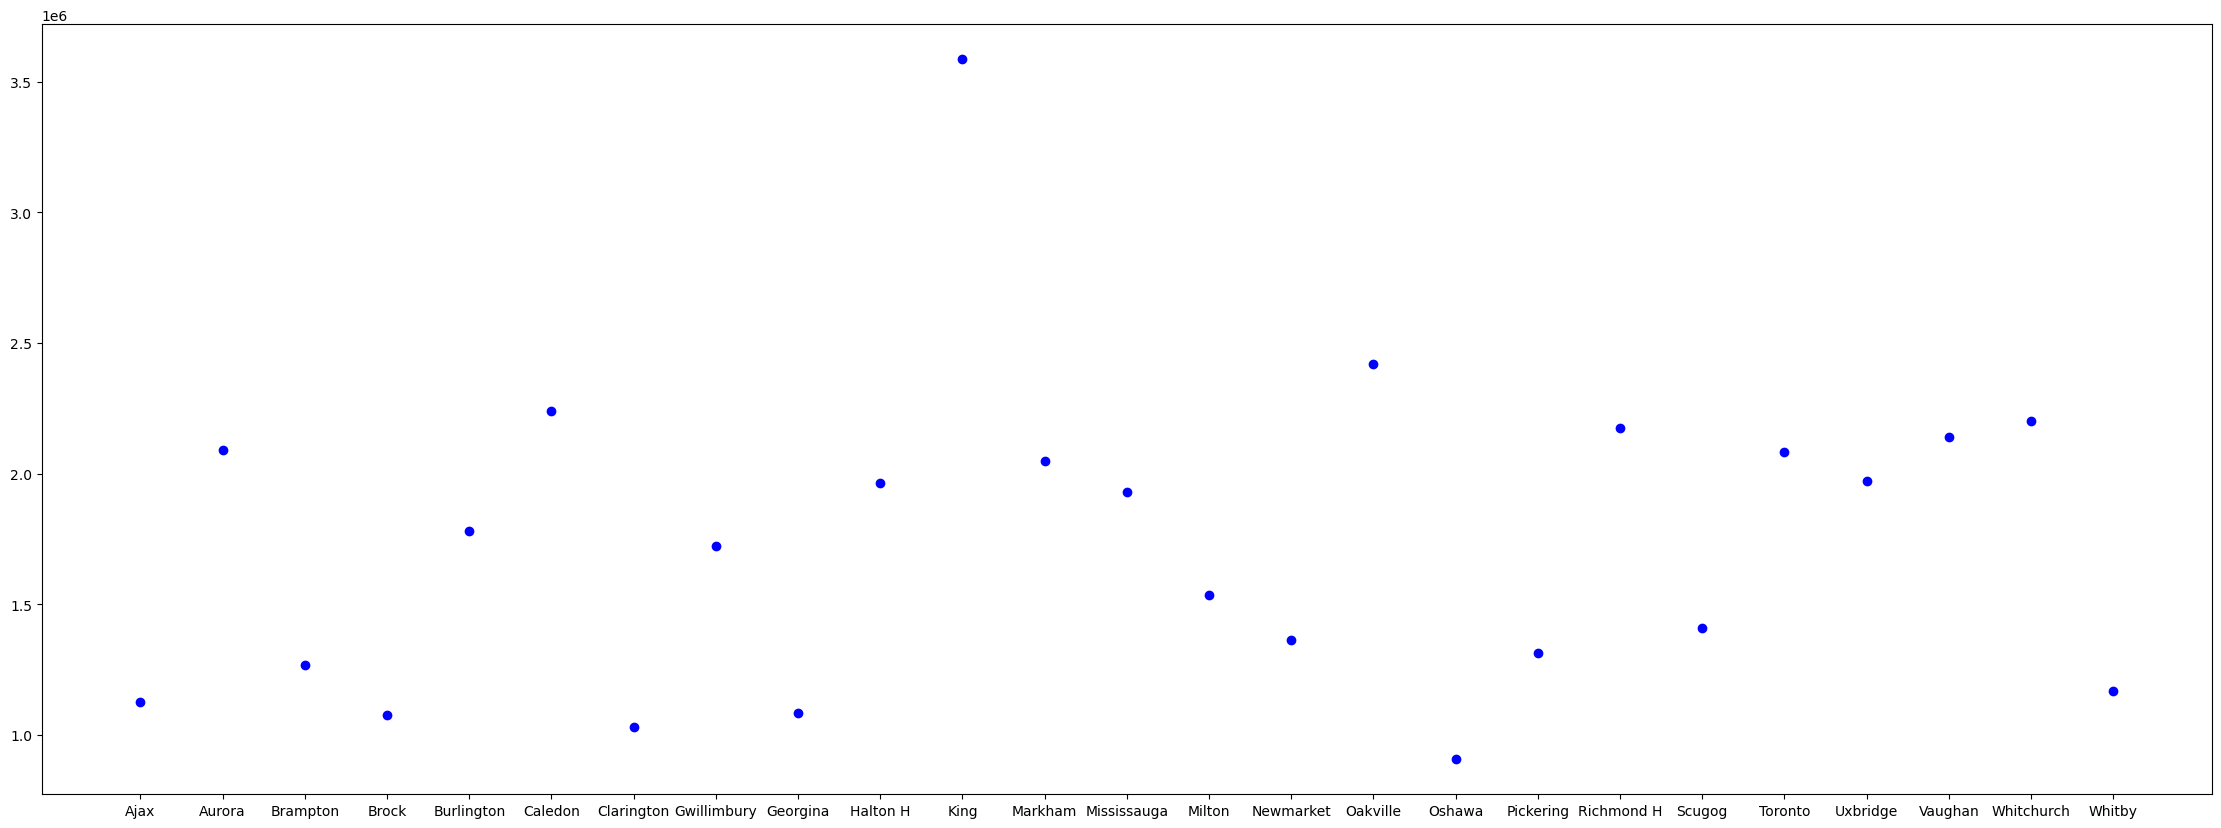

In [9]:
#Defining all the cities as X-axis
cities = ['Ajax', 'Aurora', 'Brampton', 'Brock', 'Burlington', 'Caledon', 'Clarington', 
'Gwillimbury', 'Georgina', 'Halton H', 'King', 'Markham', 'Mississauga', 
'Milton', 'Newmarket', 'Oakville', 'Oshawa','Pickering', 'Richmond H', 'Scugog', 
'Toronto','Uxbridge', 'Vaughan', 'Whitchurch', 'Whitby']
#Declaring mean_price_list for all the cities as Y-axis
number_of_listings = []
mean_price_list = []
for city in cities:
    price_list = []
    city_mean_price = {}
    for result in result_set:
        values.append(list(result.values()))
        if city in result.get('CityName'):
            price_list.append(result.get('Price'))
    mean_price = round(np.mean(price_list), 2)        
    #city_mean_price[f'{city}'] = mean_price
    mean_price_list.append(mean_price)
    number_of_listings.append(len(price_list))

plt.figure(figsize=(28, 10))
#Creating a Scatterplot
plt.scatter(cities, mean_price_list, c ="blue")
# To show the plot
plt.show()

### Correlation Coefficient

> The scatterplot visualizes the relationship between two quantatives variables. It may have a direction (sloping up or down), form (a scatter that cluster around a line is called _linear_) and strength (how closely do the points follow the form?)
>
> If the form is liner, then a good measure of strength is the __correlation coefficient r:__
>
> Our data are (x<sub>i</sub>, y<sub>i</sub>), i = 1,...n.
<img src="./images/correlation_coefficient.png" alt="Formula" width="400"/>
>
> Divide by n -1 instead of n if this is also done for the standard deviations s<sub>x</sub>, s<sub>y</sub>.

### Calculating Correlation Coefficient Using an Example

> Finding Correlation Coefficient for the Single Family, Multi Family, Townhome and Condo in Brampton

In [10]:
query = ''' SELECT RemaxListings.Id, RemaxListings.Beds, RemaxListings.Baths, RemaxListings.CityName, RemaxListings.Area,
RemaxListings.ListingType, AVG(RemaxListingsAssociations.Price) AS Price 
FROM RemaxListingsAssociations INNER JOIN RemaxListings ON 
RemaxListingsAssociations.Id = RemaxListings.Id
WHERE CityName IN ('Waterloo', 'Kitchener') 
AND RemaxListings.ListingType in 
('Single Family', 'Multi-Family', 'Condo', 'Townhome', 'Condo/Townhome')
AND RemaxListings.Area > 0
AND RemaxListings.Beds IS NOT NULL 
AND RemaxListingsAssociations.Price < 10000000
GROUP BY RemaxListings.Id
'''
cursor.execute(query)
result_set = cursor.fetchall()

In [11]:
header = ['Id', 'Beds', 'Baths', 'City', 'Area', 'Type', 'Price']
#Sort the Values by Price
dict_getter = itemgetter("Price")
result_set.sort(key=dict_getter, reverse=True)

values = []
size_list = []
price_list = []
beds_list = []
for result in result_set:
    values.append(list(result.values()))
    beds_list.append(result.get('Beds'))
    size_list.append(round(result.get('Area')))
    price_list.append(round(result.get('Price')))
print(tabulate(values, headers=header))

Id                    Beds    Baths  City         Area  Type                       Price
------------------  ------  -------  ---------  ------  --------------  ----------------
M73000004-26042644      46       16  Waterloo    12136  Multi-Family         5.5e+06
M73000004-26183619      40       16  Waterloo     8932  Multi-Family         4.8e+06
M73000004-25816952      16       12  Kitchener    6500  Multi-Family         4.51667e+06
M73000004-26147038       6        9  Kitchener    6782  Single Family        4.399e+06
M73000004-26148879      36       25  Kitchener   17000  Townhome             4.35e+06
M73000004-26091128       4        5  Kitchener    3752  Single Family        3.7e+06
M73000004-26176831      30       12  Waterloo     9759  Multi-Family         3.7e+06
M73000004-26030945       7        6  Waterloo     4522  Single Family        3.5e+06
M73000004-26128014       7        5  Waterloo     4454  Single Family        3.48889e+06
M73000004-26131239       4        6  Waterloo 

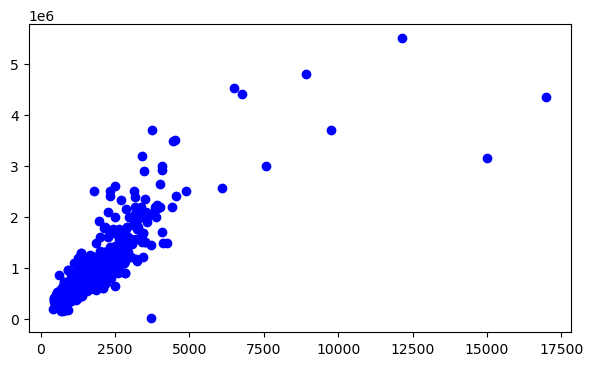

In [12]:
plt.figure(figsize=(7, 4))
#Creating a Scatterplot
plt.scatter(size_list, price_list, c ="blue")
# To show the plot
plt.show()

#### Conclusion
> As we can see from the above results the relation between square footage of the house (_predictor variable_) for each listing effects positively the pricing of those listings (_response variable_).

### Correlation Measures Linear Association
> As a convention the variable on the horizontal axis is called __explanatory variable__ or __predictor__, the one on the vertical axis is called __response__ variable.
>
> _r_ i always between -1 and 1. The sign of _r_ givest the direction of the association and its absolute value gives the strength:


In [13]:
#Calculating Correlation Coeffcient
corr = np.corrcoef(size_list, price_list)

> The corrcoef() function returns the correlation matrix, which is a two-dimensional array with the correlation coefficients. 
> Here’s a   simplified version of the correlation matrix you just created:

In [14]:
print(f'Correlation Coefficient is as followed:')
print(f'x = {corr[0][0]} and y = {corr[0][1]}')

Correlation Coefficient is as followed:
x = 1.0 and y = 0.8485040275036888


> The positive _r_ value returns upward scatter and negative _r_ returns downward scatter. Closer the value of the _r_ is to zero, more the data is spread out across x and y axis.

### Correlation Coefficient for Price-Area of the House

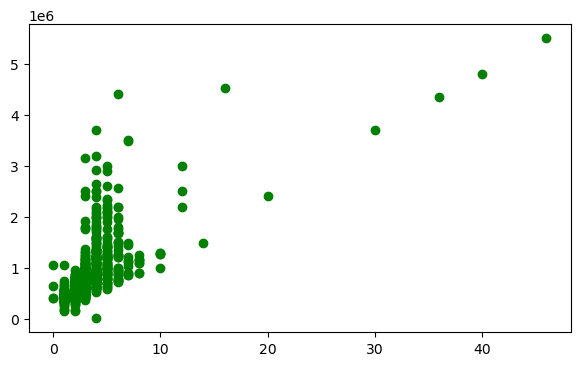

In [15]:
plt.figure(figsize=(7, 4))
#Creating a Scatterplot
plt.scatter(beds_list, price_list, c ="green")
# To show the plot
plt.show()

In [16]:
print(f'Correlation Coefficient is as followed:')
print(f'x = {corr[0][0]} and y = {corr[0][1]}')

Correlation Coefficient is as followed:
x = 1.0 and y = 0.8485040275036888


#### Conclusion
> As we can see from the above results the relation between the number of beds in the house (_predictor variable_) for each listing effect positively the pricing of those listings (_response variable_).

### Correlation Coefficient for Price-Walkscore of the House

In [17]:
query = ''' SELECT ZillowListings.Id, ZillowListings.CityName,
ZillowListings.ListingType, AVG(ZillowListingsAssociations.Price) AS Price,
ZillowListingsWalkscore.WalkScore, ZillowListingsWalkscore.TransitScore 
FROM ZillowListings
INNER JOIN ZillowListingsAssociations ON 
ZillowListings.Id = ZillowListingsAssociations.Id
INNER JOIN ZillowListingsWalkscore ON 
ZillowListings.Id = ZillowListingsWalkscore.Id
WHERE ZillowListings.CityName IN ('Windsor') 
AND ZillowListings.ListingType in 
('SINGLE_FAMILY', 'APARTMENT', 'CONDO', 'TOWNHOUSE', 'MULTI_FAMILY')
AND ZillowListingsAssociations.Price > 10000 
AND ZillowListingsWalkscore.WalkScore IS NOT NULL
AND ZillowListingsWalkscore.TransitScore IS NOT NULL
GROUP BY ZillowListings.Id'''
cursor.execute(query)
result_set = cursor.fetchall()

In [18]:
header = ['Id', 'City', 'Type', 'Price', 'WalkScore', 'TransitScore']
#Sort the Values by Price
dict_getter = itemgetter("Price")
result_set.sort(key=dict_getter, reverse=True)

values = []
walkscore_list = []
transitscore_list = []
price_list = []
for result in result_set:
    values.append(list(result.values()))
    walkscore_list.append(round(result.get('WalkScore')))
    transitscore_list.append(round(result.get('TransitScore')))
    price_list.append(round(result.get('Price')))
#rint(tabulate(values, headers=header))

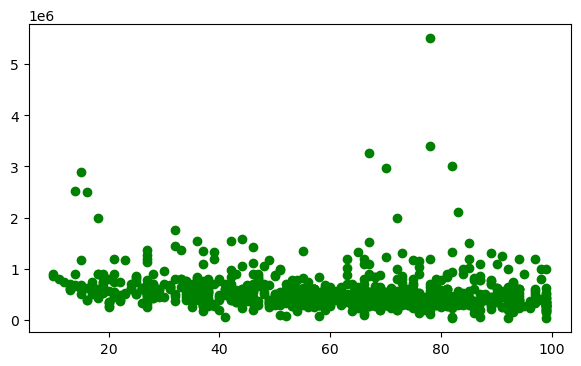

In [19]:
plt.figure(figsize=(7, 4))
#Creating a Scatterplot
plt.scatter(walkscore_list, price_list, c ="green")
# To show the plot
plt.show()

In [20]:
#Calculating Correlation Coeffcient
corr = np.corrcoef(walkscore_list, price_list)
print(f'Correlation Coefficient is as followed:')
print(f'x = {corr[0][0]} and y = {corr[0][1]}')

Correlation Coefficient is as followed:
x = 1.0 and y = -0.16208357276369023


#### Conclusion
> As we can see from the above results the relation between the walkscore (_predictor variable_) of each listing do not effect the pricing of those listings (_response variable_).